In [28]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [29]:
loc_P04 = '/home/saumya/Documents/Flame-diagonis-Dip/Schlieren-Data/German_data/cl19340rcch006/'
# loc_P04 = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/P04/'

In [30]:
data = np.load(loc_P04+'cl19340rcch006.npy')

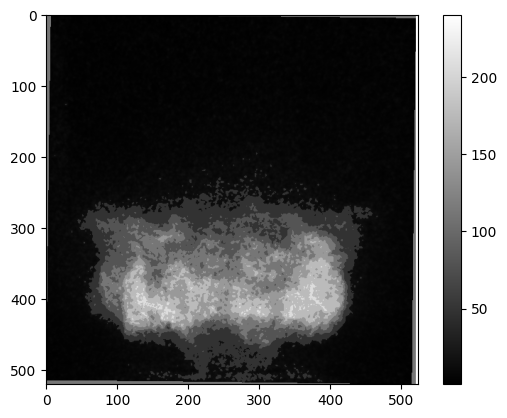

In [31]:
peg = plt.imshow(data[200], cmap='gray')
plt.colorbar(peg)

In [32]:
patches = []
for i in range(data.shape[0]):
    patches.append(patchify.patchify(data[i], (9, 9), 9))
patches = np.array(patches)

In [33]:
patches.shape

(8192, 57, 58, 9, 9)

In [34]:
mean = np.zeros(patches.shape[:3])
# median = np.zeros(patches.shape[:3])
# mode = np.zeros(patches.shape[:3])
for k in range(data.shape[0]):
#     # exec(f'mean_{k} = []')
    for i in range(patches.shape[1]):
        for j in range(patches.shape[2]):
            mean[k][i][j] = np.mean(patches[k][i][j])
            # median[k][i][j] = np.median(patches[k][i][j])
            # mode[k][i][j] = np.mode(patches[k][i][j])

In [35]:
mean.shape

(8192, 57, 58)

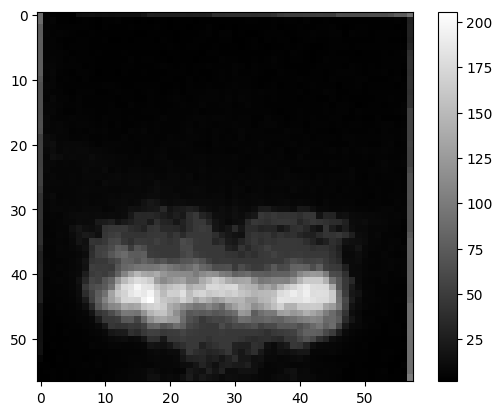

In [36]:
neg = plt.imshow(np.array(mean[100]), cmap='gray')
plt.colorbar(neg)

In [37]:
mean_all = np.mean(mean)
print(mean_all)
mean_adj = mean - mean_all

33.59635495847851


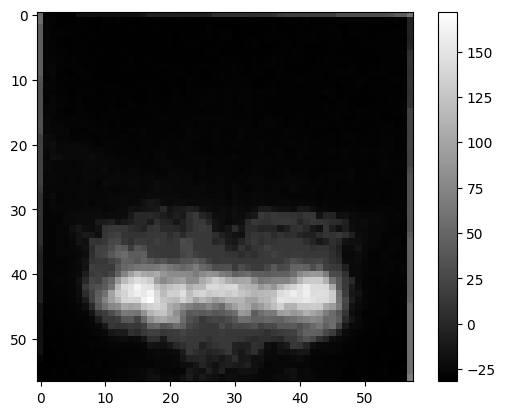

In [38]:
neg = plt.imshow(np.array(mean_adj[100]), cmap='gray')
plt.colorbar(neg)

In [39]:
cropped_data = []
for k in mean_adj:
    cropped_data.append(k[30:,7:50])
cropped_data = np.array(cropped_data)

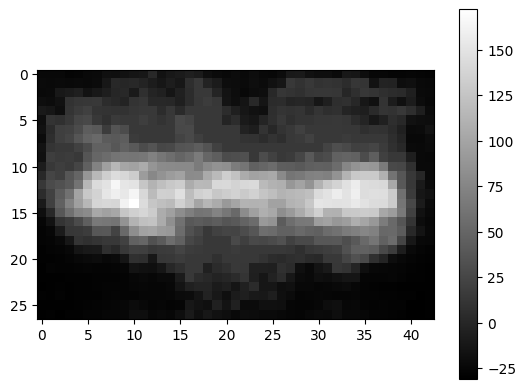

In [40]:
neg = plt.imshow(np.array(cropped_data[100]), cmap='gray')
plt.colorbar(neg)

In [41]:
sig = cropped_data[:, 15, 10]

In [42]:
import pywt

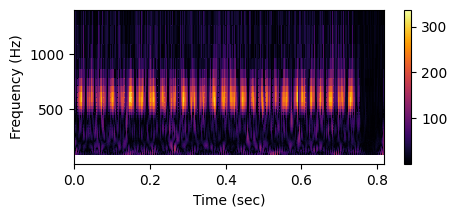

In [51]:
fs = 10*1000
sampling_period = 1/fs
t = np.linspace(0, 8192, 8192)
t = t/fs

wavelet = 'morl'
scale = np.arange(1, 100)


f = pywt.scale2frequency(wavelet, scale)/sampling_period 

coef, freqs = pywt.cwt(sig, scale, wavelet=wavelet,
                       sampling_period=sampling_period)



# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
neg = plt.pcolor(t, freqs, abs(coef), cmap='inferno')
plt.colorbar(neg)
# Set yscale, ylim and labels
# plt.yscale('log')
plt.ylim([1, 1400])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.savefig('egg_german.png', dpi=150)

In [44]:
np.savetxt("sig.csv", sig, delimiter=",")

In [50]:
import scaleogram as scg

ax = scg.cws(t, sig,  abs(coef), wavelet=wavelet)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [46]:
np.linspace(0, int(8192/fs), 8192).shape

(8192,)

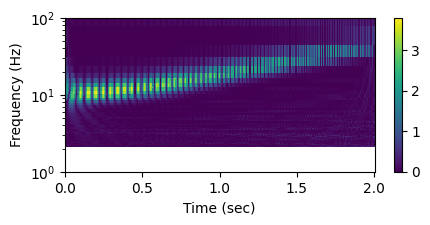

In [47]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import chirp

# Define signal
fs = 128
sampling_period = 1 / fs
t = np.linspace(0, 2, 2 * fs)
x = chirp(t, 10, 2, 40, 'quadratic')

# Calculate continuous wavelet transform
coef, freqs = pywt.cwt(x, np.arange(1, 50), 'morl',
                       sampling_period=sampling_period)

# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
peg = plt.pcolor(t, freqs, abs(coef))

plt.colorbar(peg)
# Set yscale, ylim and labels
plt.yscale('log')
plt.ylim([1, 100])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.savefig('egg_synth.png', dpi=150)

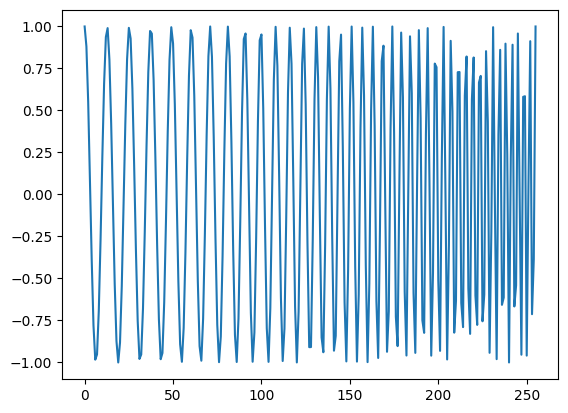

In [48]:
plt.plot(x)

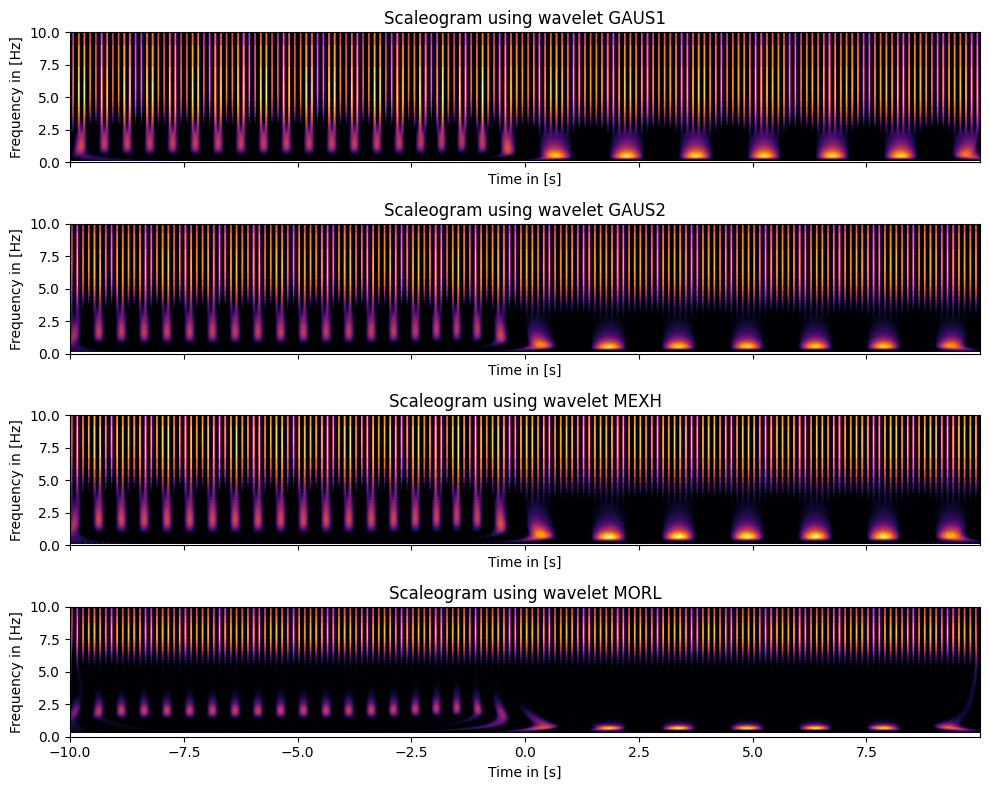

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi as π
from scipy.signal import spectrogram, wavelets
import pywt
import random


f_s = 200              # Sampling rate = number of measurements per second in [Hz]
t   = np.arange(-10,10, 1 / f_s) # Time between [-10s,10s].
T1  = np.tanh(t)/2  + 1.0 # Period in [s]
T2  = 0.125               # Period in [s]
f1  = 1 / T1              # Frequency in [Hz]
f2  = 1 / T2              # Frequency in [Hz] 

N = len(t)
x = 13 * np.sin(2 * π * f1 * t) + 42 * np.sin(2 * π * f2 * t)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = True, figsize = (10,8))


wvoptions=iter(['gaus1','gaus2','mexh','morl'])

axes=[ax1,ax2,ax3,ax4]


for ax in axes:
    # Wavelet transform, i.e. scaleogram
    try:
        choice=next(wvoptions)
        cwtmatr, freqs = pywt.cwt(x, np.arange(1, 512), choice, sampling_period = 1 / f_s)
        im = ax.pcolormesh(t, freqs, cwtmatr, vmin=0, cmap = "inferno" )  
        ax.set_ylim(0,10)
        ax.set_ylabel("Frequency in [Hz]")
        ax.set_xlabel("Time in [s]")
        ax.set_title(f"Scaleogram using wavelet {choice.upper()}")
    except:
        pass
# plt.savefig("./fourplot.pdf")

plt.tight_layout()
plt.show()
